In [2]:
import pandas as pd

In [3]:
import pandas as pd
import numpy as np
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

In [4]:
df=pd.read_csv('DATASET-balanced.csv')

In [5]:
df

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,FAKE
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,FAKE
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,FAKE
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,FAKE
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,FAKE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11773,0.435426,0.025303,2772.575031,2728.757601,4998.670213,0.074323,-342.309753,144.490418,-79.272942,8.890874,...,-17.982819,-7.831161,-1.127167,-7.669674,-0.653850,-8.037575,-2.671002,-4.483765,-3.355975,REAL
11774,0.454611,0.070578,1029.274601,1519.231563,1922.927486,0.026553,-332.230408,202.603012,-0.181929,-2.146542,...,-2.018668,-2.705635,-1.589172,-2.938737,-0.972690,-1.706672,-2.796168,2.171270,-1.660128,REAL
11775,0.374432,0.019063,4063.645317,3558.261357,7299.133512,0.110278,-372.149109,92.670235,-29.082432,59.736637,...,-6.628118,-3.827499,-7.287946,-2.899543,-11.508186,-1.296590,-14.325416,-4.405540,-15.869982,REAL
11776,0.410885,0.090499,1124.655596,1553.651133,2065.942806,0.031761,-328.062805,193.557526,6.779151,-1.304731,...,-5.437202,-4.252508,-1.258683,-2.107233,-1.018154,-2.716950,-3.681598,3.811063,3.948419,REAL


In [6]:
df = shuffle(df, random_state=42)

In [7]:
X = df.drop('LABEL', axis=1)  # Assuming 'labels' is the column name for labels
y = df['LABEL']

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
X_train = (X_train - X_train.mean()) / X_train.std()

In [11]:
X_test = (X_test - X_train.mean()) / X_train.std()

In [12]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()


In [13]:
X_train

array([[ 0.23203113, -0.3258872 ,  1.39402335, ..., -1.49065511,
        -1.78407362, -1.5254322 ],
       [ 3.37580432, -1.11564964,  1.04718186, ...,  0.78671001,
         0.0430698 , -0.43329631],
       [-1.26555831, -0.77269688, -0.03080301, ..., -0.66823294,
        -1.36484873,  0.30385264],
       ...,
       [ 0.24822011,  0.33131397, -0.51112342, ..., -0.24892641,
         1.0822206 ,  0.14990148],
       [-0.44783383, -0.28279496, -0.87546581, ..., -0.78615502,
         0.40348921, -0.06197293],
       [-1.11907623, -0.09082567, -1.00801289, ..., -0.42960309,
         0.72406167, -0.12603736]])

In [18]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense,Conv1D,MaxPool1D

In [32]:
model1 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], 1))
    ,
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer='l1')
])

In [33]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [25]:
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



In [34]:
model1.fit(X_train1, y_train, epochs=10, batch_size=32, )

Epoch 1/10
295/295 [==============================] - 12s 8ms/step - loss: 0.6209 - accuracy: 0.7182
Epoch 2/10
295/295 [==============================] - 2s 7ms/step - loss: 0.5147 - accuracy: 0.7907
Epoch 3/10
295/295 [==============================] - 2s 7ms/step - loss: 0.4093 - accuracy: 0.8473
Epoch 4/10
295/295 [==============================] - 2s 7ms/step - loss: 0.3523 - accuracy: 0.8672
Epoch 5/10
295/295 [==============================] - 2s 7ms/step - loss: 0.3216 - accuracy: 0.8750
Epoch 6/10
295/295 [==============================] - 2s 7ms/step - loss: 0.2850 - accuracy: 0.8903
Epoch 7/10
295/295 [==============================] - 2s 7ms/step - loss: 0.2710 - accuracy: 0.8950
Epoch 8/10
295/295 [==============================] - 2s 7ms/step - loss: 0.2608 - accuracy: 0.9028
Epoch 9/10
295/295 [==============================] - 2s 7ms/step - loss: 0.2442 - accuracy: 0.9100
Epoch 10/10
295/295 [==============================] - 2s 7ms/step - loss: 0.2361 - accuracy: 0.916

In [35]:
model1.fit(X_train1, y_train, epochs=100, batch_size=32, )

Epoch 1/100
295/295 [==============================] - 2s 8ms/step - loss: 0.2295 - accuracy: 0.9203
Epoch 2/100
295/295 [==============================] - 2s 7ms/step - loss: 0.2136 - accuracy: 0.9272
Epoch 3/100
295/295 [==============================] - 2s 7ms/step - loss: 0.2008 - accuracy: 0.9353
Epoch 4/100
295/295 [==============================] - 2s 7ms/step - loss: 0.1882 - accuracy: 0.9400
Epoch 5/100
295/295 [==============================] - 2s 7ms/step - loss: 0.1751 - accuracy: 0.9460
Epoch 6/100
295/295 [==============================] - 2s 7ms/step - loss: 0.1712 - accuracy: 0.9481
Epoch 7/100
295/295 [==============================] - 2s 7ms/step - loss: 0.1642 - accuracy: 0.9492
Epoch 8/100
295/295 [==============================] - 2s 7ms/step - loss: 0.1541 - accuracy: 0.9532
Epoch 9/100
295/295 [==============================] - 2s 7ms/step - loss: 0.1462 - accuracy: 0.9561
Epoch 10/100
295/295 [==============================] - 2s 7ms/step - loss: 0.1418 - accura

In [39]:
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



In [42]:
model1.evaluate(X_test1,y_test)

74/74 [==============================] - 0s 6ms/step - loss: 2.8725 - accuracy: 0.5166


[2.8724935054779053, 0.5165534615516663]

In [43]:
class_counts = df['LABEL'].value_counts()
print(class_counts)

REAL    5889
FAKE    5889
Name: LABEL, dtype: int64


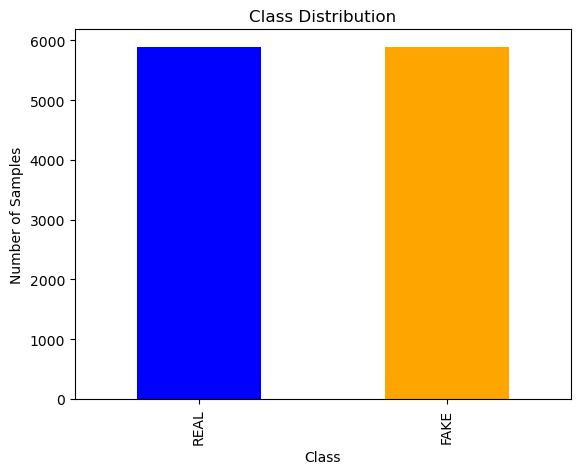

In [44]:
import matplotlib.pyplot as plt

class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model1.predict(X_test1)

# Convert probabilities to class labels
y_pred_classes = (y_pred > 0.5).astype(int)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


74/74 [==============================] - 1s 3ms/step
Confusion Matrix:
[[1047  138]
 [1001  170]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.88      0.65      1185
           1       0.55      0.15      0.23      1171

    accuracy                           0.52      2356
   macro avg       0.53      0.51      0.44      2356
weighted avg       0.53      0.52      0.44      2356



Epoch 1/2
236/236 [==============================] - 2s 9ms/step - loss: 0.0197 - accuracy: 0.9972 - val_loss: 0.0212 - val_accuracy: 0.9968
Epoch 2/2
236/236 [==============================] - 2s 8ms/step - loss: 0.0176 - accuracy: 0.9973 - val_loss: 0.0259 - val_accuracy: 0.9947


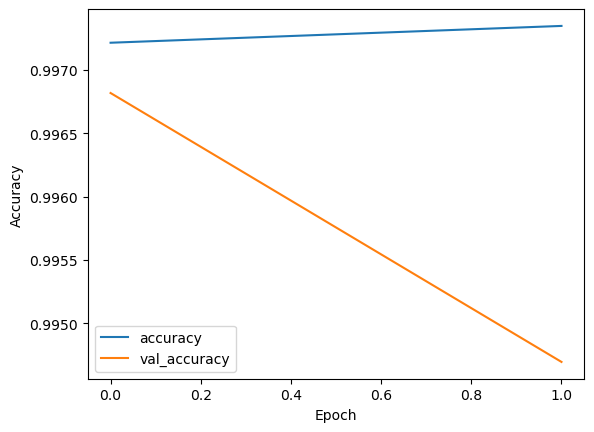

In [52]:
history = model1.fit(X_train1, y_train, epochs=2, batch_size=32, validation_split=0.2)

# Plot training curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
df.drop_duplicates()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
6459,0.441114,0.079663,922.780253,1385.841230,1606.028439,0.023917,-320.896545,211.678055,10.367925,-17.441900,...,-2.236197,1.552115,2.843510,4.692409,3.106334,-4.299569,-5.380206,4.532225,5.579152,REAL
1408,0.432119,0.039595,2413.310510,2980.346767,4658.142160,0.048391,-357.386597,141.067474,-8.478411,50.100609,...,-5.744374,3.693567,4.884624,-0.293556,9.605581,-0.679518,6.833396,0.411718,-0.786885,FAKE
4924,0.370716,0.013605,3116.226937,3141.811112,5179.419933,0.090177,-445.311676,135.565094,-18.134920,19.937037,...,-9.979925,-8.667892,-5.452301,-3.327649,-8.551641,-9.594158,-5.171256,-11.394002,-16.235928,FAKE
8115,0.354024,0.029757,2119.633001,2534.221251,3645.279255,0.049672,-358.246521,182.810425,-51.112995,22.122393,...,-20.808508,-1.759383,1.881368,-7.776491,-7.425082,-11.308017,0.909932,-7.334956,-3.903934,REAL
1617,0.441625,0.057751,2862.566856,3206.461251,4667.844347,0.081123,-328.314270,110.892700,-23.511282,21.168459,...,-5.999317,-4.273880,-7.507450,-3.208905,-4.326396,-1.923048,-3.697001,-1.108554,-5.886751,FAKE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.398987,0.025812,1724.243514,2463.524762,2473.279588,0.044195,-390.752319,182.881073,-30.246315,-19.978086,...,-5.929926,-0.163012,3.823437,-5.552043,-8.946897,-9.361128,-5.902357,-0.650009,-7.646391,REAL
5191,0.454426,0.032643,2033.752892,2868.407089,3732.961242,0.041272,-387.990601,164.800796,-1.915701,19.590897,...,1.377185,-0.699987,-1.258173,-1.575635,5.500332,1.151649,0.573495,6.227083,0.817355,FAKE
5390,0.401095,0.012461,2773.444302,3147.526071,5023.584267,0.073660,-472.232849,149.956222,-20.239588,28.226805,...,-8.255793,-1.843908,-4.664592,-1.761044,-0.244220,-1.783712,-3.926923,4.535924,-4.013871,FAKE
860,0.438628,0.064702,4031.438800,3639.684025,7451.608506,0.121602,-315.810333,97.868088,-28.679693,48.601337,...,-7.304208,-2.535949,-3.312386,-3.704831,-13.119553,-2.647419,-11.616684,-10.686745,-12.156264,FAKE


In [56]:
model1.evaluate(X_test1,y_test)

74/74 [==============================] - 0s 6ms/step - loss: 2.7163 - accuracy: 0.5149


[2.716291904449463, 0.514855682849884]

In [92]:
from sklearn.ensemble import StackingClassifier

In [95]:
clf=StackingClassifier(estimators=)

SyntaxError: invalid syntax (784747497.py, line 1)

In [87]:
clf.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [88]:
clf.score(X_train,y_train)

1.0

In [89]:
clf.score(X_test,y_test)

0.5755517826825127

In [109]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.head(10))
print(y.head(10))

       chroma_stft       rms  spectral_centroid  spectral_bandwidth  \
6459      0.441114  0.079663         922.780253         1385.841230   
1408      0.432119  0.039595        2413.310510         2980.346767   
4924      0.370716  0.013605        3116.226937         3141.811112   
8115      0.354024  0.029757        2119.633001         2534.221251   
1617      0.441625  0.057751        2862.566856         3206.461251   
3312      0.488258  0.026187        2156.142665         2965.155989   
4832      0.482466  0.009496        4084.555415         3673.238420   
10272     0.356286  0.045357        2621.105272         2428.555119   
4467      0.435941  0.032985        2284.920805         3307.351531   
6836      0.365173  0.041530        2474.050068         2625.397514   

           rolloff  zero_crossing_rate       mfcc1       mfcc2      mfcc3  \
6459   1606.028439            0.023917 -320.896545  211.678055  10.367925   
1408   4658.142160            0.048391 -357.386597  141.067474  

In [110]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(y)
y = lb.transform(y)
y = y.ravel()
print(y)

[1 0 0 ... 0 0 1]


MLPClassifier()

In [180]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=20,shuffle=True, random_state=1)

print(model)
print("KFold splits: " + str(kf.get_n_splits(X)))

MLPClassifier()
KFold splits: 20


In [181]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score

In [182]:
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

In [183]:
X_train

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
6459,0.441114,0.079663,922.780253,1385.841230,1606.028439,0.023917,-320.896545,211.678055,10.367925,-17.441900,...,-12.245130,-2.236197,1.552115,2.843510,4.692409,3.106334,-4.299569,-5.380206,4.532225,5.579152
1408,0.432119,0.039595,2413.310510,2980.346767,4658.142160,0.048391,-357.386597,141.067474,-8.478411,50.100609,...,6.779421,-5.744374,3.693567,4.884624,-0.293556,9.605581,-0.679518,6.833396,0.411718,-0.786885
4924,0.370716,0.013605,3116.226937,3141.811112,5179.419933,0.090177,-445.311676,135.565094,-18.134920,19.937037,...,-2.534549,-9.979925,-8.667892,-5.452301,-3.327649,-8.551641,-9.594158,-5.171256,-11.394002,-16.235928
8115,0.354024,0.029757,2119.633001,2534.221251,3645.279255,0.049672,-358.246521,182.810425,-51.112995,22.122393,...,-2.392598,-20.808508,-1.759383,1.881368,-7.776491,-7.425082,-11.308017,0.909932,-7.334956,-3.903934
1617,0.441625,0.057751,2862.566856,3206.461251,4667.844347,0.081123,-328.314270,110.892700,-23.511282,21.168459,...,0.444495,-5.999317,-4.273880,-7.507450,-3.208905,-4.326396,-1.923048,-3.697001,-1.108554,-5.886751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.398987,0.025812,1724.243514,2463.524762,2473.279588,0.044195,-390.752319,182.881073,-30.246315,-19.978086,...,-4.317876,-5.929926,-0.163012,3.823437,-5.552043,-8.946897,-9.361128,-5.902357,-0.650009,-7.646391
5191,0.454426,0.032643,2033.752892,2868.407089,3732.961242,0.041272,-387.990601,164.800796,-1.915701,19.590897,...,1.833217,1.377185,-0.699987,-1.258173,-1.575635,5.500332,1.151649,0.573495,6.227083,0.817355
5390,0.401095,0.012461,2773.444302,3147.526071,5023.584267,0.073660,-472.232849,149.956222,-20.239588,28.226805,...,-0.717910,-8.255793,-1.843908,-4.664592,-1.761044,-0.244220,-1.783712,-3.926923,4.535924,-4.013871
860,0.438628,0.064702,4031.438800,3639.684025,7451.608506,0.121602,-315.810333,97.868088,-28.679693,48.601337,...,-8.975235,-7.304208,-2.535949,-3.312386,-3.704831,-13.119553,-2.647419,-11.616684,-10.686745,-12.156264


In [184]:
y_train


array([1, 0, 0, ..., 0, 0, 1])

In [203]:
from sklearn.ensemble import BaggingClassifier

In [204]:
clf=BaggingClassifier()

In [205]:
clf.fit(X_train,y_train)

BaggingClassifier()

In [208]:
clf.score(X_train,y_train)

0.9981233243967829

In [209]:
clf.score(X_test,y_test)

0.9829931972789115

In [229]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [230]:
clf1=HistGradientBoostingClassifier()

In [231]:
clf1.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [232]:
clf1.score(X_train,y_train)

0.9991063449508489

In [233]:
clf1.score(X_test,y_test)

0.9914965986394558